<h2>
    Gap-filling on GPS data sets using iterative EOF and time series analysis
</h2>
    <h4>This for the NorthEast_NZ2009.csv data set.<br></h4>
    Libraries used-<br>
    numpy<br>
    pandas<br>
    os <br>
    matplotlib <br>
    eofs.standard <br>
    random <br><br>
    An iterative algorithm, EOF analysis, has been suggested the retrieve the missing values in CGPS data. Using the data, we first construct a spatial-temporal matrix. The missing values are then initialized appropriately. The method then decomposes the constructed matrix into different EOF modes. The optimum number of EOF modes are selected such that we are able to cover maximum variability in the data. The matrix is reconstructed using the number of modes calculated. An iterative update of missing values is performed, which gives the best estimate of missing data points. To verify the correctness of this method, 1-2% of the given data has been used as the cross-validation-set, to see if the missing values can be estimated correctly or not.

In [21]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from eofs.standard import Eof 
import random
import time

In [22]:
df=pd.read_csv('NorthEast_NZ2009.csv', sep=',',header=None)       # reading the .csv files and converting to dataframe
east_matrix = np.array(df.to_numpy())                        #convert to numpy array
east_matrix = east_matrix.T                        # take transpose
m = len(east_matrix)                        #rows
n = len(east_matrix[0])                     #columns
east_matrix = np.nan_to_num(east_matrix)    #fill NaN with 0
org_matrix=east_matrix                        #store the current matrix as org_matrix
print(east_matrix)
print(m)
print(n)

[[  1.47  -5.35  -0.96 ...   5.57   2.61  -5.04]
 [  0.     0.     0.   ...   0.29   0.28  -5.88]
 [ -5.34   2.96  -1.21 ...  -4.83   6.35   1.54]
 ...
 [  0.     0.     0.   ... 103.89  96.31  90.32]
 [  0.     0.     0.   ...   5.31   1.7   -5.41]
 [  0.     0.     0.   ... -13.32 -14.3  -19.2 ]]
99
4291


In [23]:
l=[]
for j in range(n):
    sum=0.0
    count=0
    for i in range(m):
        sum+=east_matrix[i][j]
        count+=1
    sum/=count
    l.append(sum)
    for i in range(m):
        if(east_matrix[i][j]!=0):
            east_matrix[i][j]-=sum

In [24]:
"""
Example of reconstructing the matrix using 20 components
"""
solver = Eof(east_matrix) 
components=20
pcs=solver.pcs(pcscaling = 0 , npcs=components)
eofs=solver.eofs(eofscaling = 0, neofs=components)
new_matrix = np.matmul(pcs,eofs)  
print(new_matrix)

[[  1.99895176   1.84545488   2.37034584 ... -14.8750036  -18.1471274
  -17.18970071]
 [  1.63121363   1.96742441   2.44530865 ... -16.00908848 -16.01687701
  -15.89751743]
 [  2.92940216   7.97051495   5.06703735 ... -13.42900833 -13.48200163
  -10.99701676]
 ...
 [  4.0244773    4.58334715   2.44013813 ...  86.02534593  82.06967177
   80.65130968]
 [  3.38115953   4.2020973    3.53658785 ... -11.52344425 -13.49892726
  -13.3571793 ]
 [  3.50377415   2.55169855   3.00587158 ... -30.27037236 -27.5445624
  -28.20781796]]


In [25]:
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=99)

In [26]:
print(eigenvalue1.shape) #shape of numpy array for 99 components

(99,)


In [27]:
sum=0.0
for i in range(len(eigenvalue1)):
    sum+=eigenvalue1[i]
print(sum)   #total variance- will be 1.00

1.0


In [28]:
"""
finding the % of variance explained by each component 
"""
for i in range(len(eigenvalue1)):  
    eigenvalue1[i]*=100
    eigenvalue1[i]/=sum
x=np.round(eigenvalue1,decimals=3)
print(x) # 10 components seems to be enough to cover the variance

[9.7939e+01 7.9600e-01 2.0200e-01 1.2800e-01 8.0000e-02 7.4000e-02
 6.6000e-02 6.0000e-02 5.0000e-02 3.9000e-02 3.6000e-02 3.2000e-02
 2.9000e-02 2.6000e-02 2.4000e-02 2.3000e-02 1.9000e-02 1.8000e-02
 1.6000e-02 1.5000e-02 1.3000e-02 1.3000e-02 1.2000e-02 1.2000e-02
 1.1000e-02 1.0000e-02 1.0000e-02 9.0000e-03 9.0000e-03 9.0000e-03
 8.0000e-03 8.0000e-03 8.0000e-03 7.0000e-03 7.0000e-03 7.0000e-03
 7.0000e-03 6.0000e-03 6.0000e-03 6.0000e-03 6.0000e-03 5.0000e-03
 5.0000e-03 5.0000e-03 5.0000e-03 5.0000e-03 5.0000e-03 4.0000e-03
 4.0000e-03 4.0000e-03 4.0000e-03 4.0000e-03 4.0000e-03 4.0000e-03
 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03
 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03
 3.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03
 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03
 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03
 2.0000e-03 2.0000e-03 2.0000e-03 1.0000e-03 1.0000e-03 1.0000

5.011366517683724


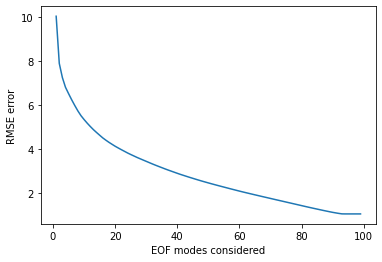

In [29]:
"""
plotting the RMSE error vs the number of EOF modes considered
"""
x_components=[]
y_error=[]
for k in range(99):
    totalerror=0.0
    pcs=solver.pcs(pcscaling = 0 , npcs=k+1)
    eofs=solver.eofs(eofscaling = 0, neofs=k+1)
    new_matrix = np.matmul(pcs,eofs)  
    for i in range(m):
        for j in range(n):
            totalerror+=(east_matrix[i][j]-new_matrix[i][j])**2
    x_components.append(k+1)
    y_error.append((totalerror/(m*n))**0.5)
plt.xlabel("EOF modes considered")
plt.ylabel("RMSE error")
plt.plot(x_components,y_error)
print(y_error[11])            #error for 12 components

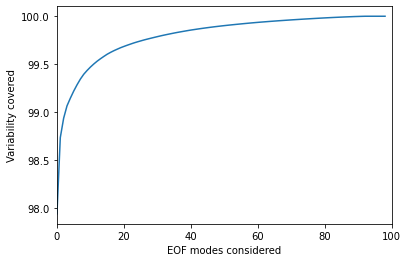

In [30]:
"""
plotting the variance expressed vs the no. of EOF modes considered
"""
variance_covered=0.0
y=[]
x=[]
for i in range(99):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=100
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)
#plot of variance covered v/s the number of components taken. we see graph flats out at approx 10-15 components.
#so we'll fix number of components to 12

In [31]:
print(east_matrix)

[[  4.47171717  -2.85212121   4.41575758 ...  -8.94040404 -12.50494949
  -15.55424242]
 [  0.           0.           0.         ... -14.22040404 -14.83494949
  -16.39424242]
 [ -2.33828283   5.45787879   4.16575758 ... -19.34040404  -8.76494949
   -8.97424242]
 ...
 [  0.           0.           0.         ...  89.37959596  81.19505051
   79.80575758]
 [  0.           0.           0.         ...  -9.20040404 -13.41494949
  -15.92424242]
 [  0.           0.           0.         ... -27.83040404 -29.41494949
  -29.71424242]]


In [32]:
"""
Refining the matrix obtained after reconstructing with 12 EOF modes.
beta value (value for convergence) has been set to 1e-6. 
You can decrease it if you want a more refined value
"""
temp_matrix=org_matrix
comp_considered=80
start=time.time()
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(m):
            for j in range(n):
                if(org_matrix[i][j] != 0):
                    x_[i][j]=org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        print(k+1, var1/var2)
        if(var1/var2 < 0.00001):
            break
end=time.time()
print(temp_matrix)

1 0.0010663496379990076
1 0.0001493171633075267
1 6.357768430764773e-05
1 3.057676755761709e-05
1 1.549421126004426e-05
1 8.088747059604724e-06
2 0.0004606029493463647
2 8.641863720987417e-05
2 3.1232058046972606e-05
2 1.4854504253797496e-05
2 8.316280199879473e-06
3 6.566528757440388e-05
3 1.9484534716115626e-05
3 1.1031203848839501e-05
3 7.178293415916516e-06
4 4.586858384101246e-05
4 1.5131377420306396e-05
4 8.641015071637468e-06
5 2.2716042713245397e-05
5 6.815919362973291e-06
6 1.673830176967122e-05
6 6.03922005456579e-06
7 1.5613591952370606e-05
7 7.858010498317845e-06
8 2.885877705227482e-05
8 1.378517634124329e-05
8 8.576228967175946e-06
9 3.127310819801302e-05
9 1.459679125946143e-05
9 8.521329935888142e-06
10 1.662519641908719e-05
10 1.0261129866952387e-05
10 7.124899795453686e-06
11 1.0193680194162512e-05
11 6.811708446007754e-06
12 1.2648438239015118e-05
12 8.07698804083699e-06
13 1.2987183647838935e-05
13 9.103454788091222e-06
14 1.3558153333206581e-05
14 8.573476626601872

In [33]:
print("Run time is:",end-start, "seconds")

Run time is: 82.92342329025269 seconds


In [34]:
print(org_matrix)

[[  4.47171717  -2.85212121   4.41575758 ...  -8.94040404 -12.50494949
  -15.55424242]
 [  0.           0.           0.         ... -14.22040404 -14.83494949
  -16.39424242]
 [ -2.33828283   5.45787879   4.16575758 ... -19.34040404  -8.76494949
   -8.97424242]
 ...
 [  0.           0.           0.         ...  89.37959596  81.19505051
   79.80575758]
 [  0.           0.           0.         ...  -9.20040404 -13.41494949
  -15.92424242]
 [  0.           0.           0.         ... -27.83040404 -29.41494949
  -29.71424242]]


In [35]:
for i in range(m):
    for j in range(n):
        temp_matrix[i][j]+=l[j]
print(temp_matrix) #reconstructed and refined dataset after applying iterative EOF analysis

[[  1.47        -5.35        -0.96       ...   5.57         2.61
   -5.04      ]
 [ 20.05131426   5.06215638  16.23743779 ...   0.29         0.28
   -5.88      ]
 [ -5.34         2.96        -1.21       ...  -4.83         6.35
    1.54      ]
 ...
 [-55.68302299 -33.7059644  -39.97622105 ... 103.89        96.31
   90.32      ]
 [  7.36067209  28.59195774  -3.24711992 ...   5.31         1.7
   -5.41      ]
 [  4.48285831   4.38858482  -4.37028813 ... -13.32       -14.3
  -19.2       ]]


In [36]:
print(temp_matrix[5][10])

6.4490769628149565


<h2> The assignment ends here.</h2>
<h4>
    Below is a test on the cross validation set showing the correctness of the EOF based gap filling method.
</h4>


   A submatrix of size 10 * 10 is taken from the original data set and 10 values are randomly set to 0.
   Number of ideal components are select to express maximum variance.
   The iterative refinement is done and finally the obtained values are compared with the original values.

-beta is set to 1e-06<br>
-number of components to cover maximum variance is taken to be 8

In [99]:
cross_valid_set=np.zeros((10,10))
new_org_matrix=np.zeros((10,10))
t=[]
for i in range(10):
    for j in range(10):
        cross_valid_set[i][j]=org_matrix[i][j]
        new_org_matrix[i][j]=org_matrix[i][j]
l=[]

for i in range(10):
    a=random.randint(0,4)
    b=random.randint(0,4)
    t.append((a,b))
    new_org_matrix[a][b]=0
    cross_valid_set[a][b]=0
for j in range(10):
    sum=0.0
    count=0
    for i in range(10):
        sum+=cross_valid_set[i][j]
        count+=1
    sum/=count
    l.append(sum)
    for i in range(10):
        if(cross_valid_set[i][j]!=0):
            cross_valid_set[i][j]-=sum
print(cross_valid_set)

[[  24.91168687    0.            0.           20.90928283    0.
    26.91872727   21.20593939   20.21809091   19.16857576   27.88578788]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [  18.10168687   29.08493939   27.59230303   36.69928283    0.
    23.91872727   48.62593939   32.96809091   29.74857576   40.62578788]
 [   0.            0.           14.49230303    0.           20.73622222
    27.53872727   11.08593939   19.27809091   16.51857576   18.78578788]
 [  27.16168687   13.95493939   31.36230303   16.75928283   25.81622222
    13.54872727    9.02593939   21.03809091   15.02857576   13.56578788]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [  30.17168687   36.72493939   36.36230303   34.09928283   28.68622222
    31.93872727   33.36593939   34.46809091   28.68857576   32.92578788]
 [  48.31168687  

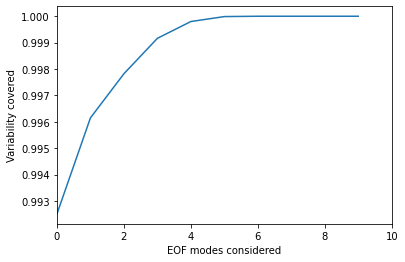

In [100]:
solver=Eof(cross_valid_set)
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=99)
variance_covered=0.0
y=[]
x=[]
for i in range(len(eigenvalue1)):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=10
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)

In [101]:
temp_matrix= cross_valid_set
comp_considered=8
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(10):
            for j in range(10):
                if(new_org_matrix[i][j] != 0):
                    x_[i][j]=new_org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        #print(k+1, var1/var2)
        #print(x_[10][35])
        
        if(var1/var2 < 0.0000001):
            break
print(temp_matrix)

[[ 4.47171717e+00 -1.52847545e+01 -3.82576578e+00 -2.60929293e+00
   1.14255219e+01  1.12424242e-01 -4.84686869e+00 -6.53303030e+00
  -1.91474747e+00  2.51262626e+00]
 [ 6.82651876e+01  8.64862062e+01  7.93298030e+01  8.15492278e+01
   7.53499790e+01  8.92918561e+01  8.67302497e+01  8.92485667e+01
   7.03091615e+01  8.47202523e+01]
 [-2.33828283e+00  5.45787879e+00  4.16575758e+00  1.31807071e+01
   6.13060903e+00 -2.88757576e+00  2.25731313e+01  6.21696970e+00
   8.66525253e+00  1.52526263e+01]
 [-3.37754512e-01 -7.90298786e+00 -8.93424242e+00 -9.40663069e+00
  -3.62555556e+00  7.32424242e-01 -1.49668687e+01 -7.47303030e+00
  -4.56474747e+00 -6.58737374e+00]
 [ 6.72171717e+00 -9.67212121e+00  7.93575758e+00 -6.75929293e+00
   1.45444444e+00 -1.32575758e+01 -1.70268687e+01 -5.71303030e+00
  -6.05474747e+00 -1.18073737e+01]
 [ 6.82651876e+01  8.64862062e+01  7.93298030e+01  8.15492278e+01
   7.53499790e+01  8.92918561e+01  8.67302497e+01  8.92485667e+01
   7.03091615e+01  8.47202523e+01

In [102]:
for i in range(len(t)):
    if(org_matrix[t[i][0]][t[i][1]]!=0): #don't consider values which were missing in the original data set.
        print(org_matrix[t[i][0]][t[i][1]]+l[t[i][1]] , temp_matrix[t[i][0]][t[i][1]]+l[t[i][1]])

-19.01078787878788 -27.25231123554788
-28.85733333333333 -12.93625583953715
-33.53786868686869 -32.925206450178244
-37.90918181818182 -31.53004846694464
-28.85733333333333 -12.93625583953715
-26.47918181818182 -38.91181507444963
-33.53786868686869 -32.925206450178244
-23.95825252525253 -20.77772420914761
-6.3673333333333275 -18.23116874612663
